# SECOP II - CONTRATOS PUBLICOS

## Desarrollado por

Nicole Capote  
Daniel Morales

In [40]:
# Importamos las librerias necesarias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_recall_curve,  precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import joblib


Procedemos a iniciar el conteo del tiempo

In [2]:
import time

start_time = time.time()

Cargamos los datos  
Usaremos solamente 1.000.000 de registros en este caso

In [3]:
df = pd.read_csv('./SECOP_II_-_Procesos_de_Contrataci_n (1).csv',nrows=1000000)

/tmp/ipykernel_15269/1905525224.py:1: DtypeWarning: Columns (15,16,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./SECOP_II_-_Procesos_de_Contrataci_n (1).csv',nrows=1000000)


In [4]:
# Imprimir la forma del DataFrame
print("Forma del DataFrame:", df.shape)

Forma del DataFrame: (1000000, 59)


Analizamos la informacion de las columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 59 columns):
 #   Column                                                  Non-Null Count    Dtype 
---  ------                                                  --------------    ----- 
 0   Entidad                                                 1000000 non-null  object
 1   Nit Entidad                                             1000000 non-null  int64 
 2   Departamento Entidad                                    1000000 non-null  object
 3   Ciudad Entidad                                          1000000 non-null  object
 4   OrdenEntidad                                            1000000 non-null  object
 5   Entidad Centralizada                                    1000000 non-null  object
 6   ID del Proceso                                          1000000 non-null  object
 7   Referencia del Proceso                                  999999 non-null   object
 8   PCI                    

Vamos a ver la informacion de la columna Adjudicado

In [6]:
df["Adjudicado"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Adjudicado
Non-Null Count    Dtype 
--------------    ----- 
1000000 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


Visualizamos los datos de nuestro dataset

In [7]:
df.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,ID del Proceso,Referencia del Proceso,PCI,ID del Portafolio,...,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Codigo Principal de Categoria,Estado de Apertura del Proceso,Tipo de Contrato,Subtipo de Contrato,Categorias Adicionales,URLProceso,Codigo Entidad,Estado Resumen
0,LA CORPORACION COLOMBIANA DE INVESTIGACION AGR...,800194600,Cundinamarca,Mosquera,Nacional,Si,CO1.REQ.3663006,401742,ND,CO1.BDOS.3568669,...,No Adjudicado,No Adjudicado,V1.41116000,Abierto,Suministros,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...,718046428,Presentación de oferta
1,SANTIAGO DE CALI DISTRITO ESPECIAL DEPARTAMENT...,890399011,No Definido,No Definido,Territorial,No,CO1.REQ.723276,4137.010.32.1.091-2019,ND,CO1.BDOS.702204,...,No Adjudicado,No Adjudicado,V1.80111600,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...,704025808,Adjudicado
2,INSTITUTO DE HIDROLOGIA METEOROLOGÍA Y ESTUDIO...,830000602,No Definido,No Definido,Nacional,Si,CO1.REQ.4683780,SAMC-016-2023,32-02-00,CO1.BDOS.4577403,...,No Adjudicado,No Adjudicado,V1.72153900,Cerrado,Obra,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...,700696065,Presentación de observaciones
3,EMPRESAS MUNICIPALES DE CALI,890399003,Valle del Cauca,Cali,Territorial,Si,CO1.REQ.4015494,300-IP-1147-2023,ND,CO1.BDOS.3920026,...,No Adjudicado,No Adjudicado,V1.80111600,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...,718393382,Presentación de oferta
4,INSTITUCION EDUCATIVA NELSY GARCÍA OCAMPOIBAGUE,809012621,Tolima,Ibagué,Territorial,Si,CO1.REQ.4409253,CT 005-2023,ND,CO1.BDOS.4309513,...,No Adjudicado,No Adjudicado,V1.47131600,Abierto,Compraventa,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...,718655392,Presentación de oferta


In [8]:
# Seleccionamos las columnas que vamos a usar para predecir
columns = ['Entidad', 'Departamento Entidad', 'Ciudad Entidad', 'OrdenEntidad', 'Entidad Centralizada', 'Fase', 'Precio Base', 'Modalidad de Contratacion', 'Duracion', 'Unidad de Duracion', 'Tipo de Contrato', 'Subtipo de Contrato','Justificación Modalidad de Contratación','Proveedores Invitados']

Procedemos a contabilizar los datos nulos

In [9]:
umbral = 1000

# Obtén una serie con la cantidad de valores nulos y cadenas vacías por columna
null_and_empty_counts = (df == '').sum() + df.isnull().sum()

# Filtra las columnas que tienen más de cierta cantidad de valores nulos o cadenas vacías (ajusta el umbral según sea necesario)
columns_to_drop = null_and_empty_counts[null_and_empty_counts > umbral].index

# Muestra las columnas identificadas
print("Columnas con muchos datos vacíos:")
print(columns_to_drop)

Columnas con muchos datos vacíos:
Index(['PCI', 'Nombre del Procedimiento', 'Descripción del Procedimiento',
       'Fecha de Publicacion (Fase Planeacion Precalificacion)',
       'Fecha de Publicacion (Fase Seleccion Precalificacion)',
       'Fecha de Publicacion (Manifestacion de Interes)',
       'Fecha de Publicacion (Fase Borrador)',
       'Fecha de Publicacion (Fase Seleccion)',
       'Fecha de Recepcion de Respuestas', 'Fecha de Apertura de Respuesta',
       'Fecha de Apertura Efectiva', 'Fecha Adjudicacion'],
      dtype='object')


Eliminamos columnas con muchos datos nulos

In [10]:
# Elimina las columnas identificadas con muchos datos vacíos
df.drop(columns=columns_to_drop, inplace=True)

# Muestra la información actualizada del DataFrame
print("DataFrame después de eliminar columnas:")
print(df.info())

DataFrame después de eliminar columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column                                   Non-Null Count    Dtype 
---  ------                                   --------------    ----- 
 0   Entidad                                  1000000 non-null  object
 1   Nit Entidad                              1000000 non-null  int64 
 2   Departamento Entidad                     1000000 non-null  object
 3   Ciudad Entidad                           1000000 non-null  object
 4   OrdenEntidad                             1000000 non-null  object
 5   Entidad Centralizada                     1000000 non-null  object
 6   ID del Proceso                           1000000 non-null  object
 7   Referencia del Proceso                   999999 non-null   object
 8   ID del Portafolio                        1000000 non-null  object
 9   Fase                                     1000000 non-null  obj

Convertimos las variables categoricas a valores numericos

In [11]:
# Preprocesamiento de los datos
# Convertimos las columnas categóricas a valores numéricos
le = LabelEncoder()

le_adjudicado = LabelEncoder()
df['Adjudicado'] = le_adjudicado.fit_transform(df['Adjudicado'])

le_entidad = LabelEncoder()
df['Entidad'] = le_entidad.fit_transform(df['Entidad'])

le_departamento = LabelEncoder()
df['Departamento Entidad'] = le_departamento.fit_transform(df['Departamento Entidad'])

le_ciudad = LabelEncoder()
df['Ciudad Entidad'] = le_ciudad.fit_transform(df['Ciudad Entidad'])

le_orden = LabelEncoder()
df['OrdenEntidad'] = le_orden.fit_transform(df['OrdenEntidad'])

le_centralizada = LabelEncoder()
df['Entidad Centralizada'] = le_centralizada.fit_transform(df['Entidad Centralizada'])

le_fase = LabelEncoder()
df['Fase'] = le_fase.fit_transform(df['Fase'])

le_modalidad = LabelEncoder()
df['Modalidad de Contratacion'] = le_modalidad.fit_transform(df['Modalidad de Contratacion'])

le_duracion = LabelEncoder()
df['Unidad de Duracion'] = le_duracion.fit_transform(df['Unidad de Duracion'])

le_tipo = LabelEncoder()
df['Tipo de Contrato'] = le_tipo.fit_transform(df['Tipo de Contrato'])

le_subtipo = LabelEncoder()
df['Subtipo de Contrato'] = le_subtipo.fit_transform(df['Subtipo de Contrato'])

le_justificacion = LabelEncoder()
df['Justificación Modalidad de Contratación'] = le_justificacion.fit_transform(df['Justificación Modalidad de Contratación'])

le_proveedores = LabelEncoder()
df['Proveedores Invitados'] = le_proveedores.fit_transform(df['Proveedores Invitados'])

In [12]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                                   Non-Null Count    Dtype
---  ------                                   --------------    -----
 0   Entidad                                  1000000 non-null  int64
 1   Departamento Entidad                     1000000 non-null  int64
 2   Ciudad Entidad                           1000000 non-null  int64
 3   OrdenEntidad                             1000000 non-null  int64
 4   Entidad Centralizada                     1000000 non-null  int64
 5   Fase                                     1000000 non-null  int64
 6   Precio Base                              1000000 non-null  int64
 7   Modalidad de Contratacion                1000000 non-null  int64
 8   Duracion                                 1000000 non-null  int64
 9   Unidad de Duracion                       1000000 non-null  int64
 10  Tipo de Contrato                         10

Seleccionamos las variables necesarias

In [13]:
df[columns].head()



,Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,Fase,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Tipo de Contrato,Subtipo de Contrato,Justificación Modalidad de Contratación,Proveedores Invitados
0,7879,12,504,1,1,9,0,5,10,1,16,0,35,0
1,8565,22,521,3,0,9,11284000,4,106,1,15,0,36,0
2,7500,22,521,1,1,7,156079370,14,4,2,13,0,32,162
3,2396,31,114,3,1,9,10340000,5,120,1,15,0,35,0
4,5641,30,371,3,1,9,6537100,5,2,1,6,0,35,0


In [14]:
X = df[columns]
y = df['Adjudicado']

In [18]:
X.head()

,Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,Fase,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Tipo de Contrato,Subtipo de Contrato,Justificación Modalidad de Contratación,Proveedores Invitados
0,7879,12,504,1,1,9,0,5,10,1,16,0,35,0
1,8565,22,521,3,0,9,11284000,4,106,1,15,0,36,0
2,7500,22,521,1,1,7,156079370,14,4,2,13,0,32,162
3,2396,31,114,3,1,9,10340000,5,120,1,15,0,35,0
4,5641,30,371,3,1,9,6537100,5,2,1,6,0,35,0


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Adjudicado, dtype: int64

In [28]:
df[columns].shape

(1000000, 14)

## Dividir los datos para entrenamiento y pruebas

In [30]:
# Dividimos los datos en conjuntos de entrenamiento y prueba, 20% de los datos se usaran como prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Creamos el modelo, usamos Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacemos predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

In [33]:
# Evaluamos el modelo
print('Precisión del modelo [Conjunto prueba]:', accuracy_score(y_test, y_pred))

# Precisión en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
print('Precisión en el conjunto de entrenamiento:', accuracy_score(y_train, y_train_pred))

# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)


Precisión del modelo [Conjunto prueba]: 0.99492
Precisión en el conjunto de entrenamiento: 0.99988
Matriz de Confusión:
[[180583    937]
 [    79  18401]]


In [34]:
# Calculamos la precisión, recall y F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [35]:
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# Calculamos la precisión, recall y F1-score
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

print(f"Precisión: {precision}")
print(f"Recall: {recall}")

Precisión: 0.9515461785086359
Recall: 0.9957251082251082
F1-score: 0.9731344862234915
Precisión: [0.0924     0.80211815 0.87099967 0.90168334 0.91958599 0.92901669
 0.93498609 0.93802345 0.94079316 0.94247246 0.94362745 0.94444728
 0.9449302  0.94536246 0.94589476 0.94633072 0.94662159 0.94681015
 0.94710134 0.94729286 0.94758437 0.94782207 0.94791934 0.94816259
 0.94821126 0.94840598 0.94860077 0.94859813 0.94883912 0.94893661
 0.94922397 0.94946795 0.9496144  0.94966322 0.94980715 0.94985342
 0.94985084 0.94984826 0.94989712 0.95004373 0.95008234 0.95007977
 0.95022135 0.95021366 0.9502111  0.95035023 0.95054096 0.95063637
 0.95082221 0.95081967 0.95090253 0.95089999 0.95089746 0.95102694
 0.95106844 0.95106086 0.95120062 0.95119558 0.95118297 0.95118045
 0.95136197 0.95149948 0.95154618 0.95154367 0.95167632 0.95166382
 0.95166132 0.95170057 0.95188274 0.95188024 0.95187775 0.95189716
 0.95193903 0.95193654 0.95193405 0.95190911 0.95204484 0.95204235
 0.95216578 0.95228442 0.9523066

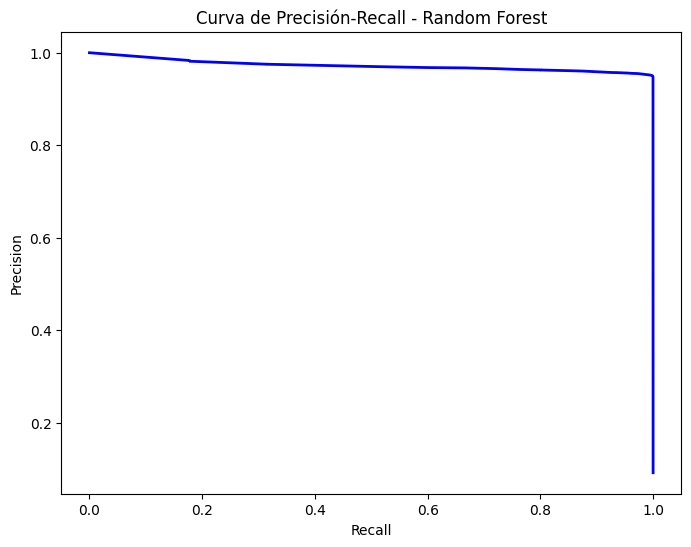

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - Random Forest')
plt.show()

In [38]:
# Aplicamos cross-validation
scores = cross_val_score(model, X.sample(frac=0.1), y.sample(frac=0.1), cv=3)
print('Precisión de cross-validation:', scores.mean())

Precisión de cross-validation: 0.8915300009782962


## Guardamos el modelo

In [41]:
# Guardar el modelo en un archivo
joblib.dump(model, 'modelo_entrenado.joblib')

['modelo_entrenado.joblib']